# Modelos de regressão para modelagem de sinistros em planos de saúdes

Um seguro de saúde ou plano de saúde constitui um seguro de proteção das pessoas contra o risco de terem que vir a incorrer em despesas médicas e esse serviço é oferecido por empresas privadas e operadoras. No Brasil a lei 9.656 de 1998 é quem as atividades das empresas e operadoras que ofertam esse tipo de contrato de serviço.

Segundo essa lei (que pode ser acessada [aqui](http://www.planalto.gov.br/ccivil_03/LEIS/L9656.htm#:~:text=L9656&text=LEI%20N%C2%BA%209.656%2C%20DE%203%20DE%20JUNHO%20DE%201998.&text=Disp%C3%B5e%20sobre%20os%20planos%20e%20seguros%20privados%20de%20assist%C3%AAncia%20%C3%A0%20sa%C3%BAde.&text=%C2%A7%205o%20%C3%89%20vedada,privado%20de%20assist%C3%AAncia%20%C3%A0%20sa%C3%BAde.)) no inciso I do parágrafo 1º um Plano Privado de Assistência à Saúde é,

     "prestação continuada de serviços ou cobertura de custos assistenciais a preço pré ou pós estabelecido, por prazo                indeterminado, com a finalidade de garantir, sem limite financeiro, a assistência à saúde, pela faculdade de acesso e          atendimento por profissionais ou serviços de saúde, livremente escolhidos, integrantes ou não de rede credenciada,              contratada ou referenciada, visando a assistência médica, hospitalar e odontológica, a ser paga integral ou parcialmente        às expensas da operadora contratada, mediante reembolso ou pagamento direto ao prestador, por conta e ordem do                  consumidor."   
      
E no inciso II desse mesmo parágrafo dessa lei as operadoras podem ser "sociedade civil ou comercial, cooperativa, ou entidade de autogestão". O conjunto de contratos dessa pertação de serviço é chamada de *carteira* (conforme o inciso III).

Assim como no Brasil, todos os outros países do mundo possuem a oferta desse serviço e algum tipo de legislação específica para a sua regulamentação afim de garantir direitos de contratos, qualidade do serviço e proteção jurídica de ambas as partes envolvidas.


## Entendendo o problema

Entretanto, quando falamos de sinistros em contratos estamos nos referindo a materialização do risco. Toda pessoa tem o risco de adquirir alguma doença e para isso existem os contratos, para reduzir o risco, entretanto quando a probabilidade da pessoa adoecer ocorre, o risco se materializa e isso é chamado de sinistro.

Mas aí chegamos a um problema: **Qual deve ser o valor do sinistro para cada cliente ?**

Tendo em vista que temos muitos clientes com realidades sociais e econômicas diferentes, não é possível estipular um valor único para todos eles. O ideal seria fazer algum tipo de modelagem com base nas características desses clientes e definir por meio delas o valor ou preço do sinistro '*ideal*' para cada um deles.

O objetivo desse projeto é utilizar modelos de *machine learning* do tipo regressão para estimar o sinistr em unidades monetárias que o seguro de plano de saúde para seus clientes a partir de suas características individuais.

## Sobre os dados

O *dataset* em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/mirichoi0218/insurance#insurance.csv) e possui as seguintes variáveis:

1) *age* ou **idade**: idade do beneficiário primário

2) *sex* ou **sexo** : Se o contratante do seguro é do sexo masculino ou feminino

3) *BMI* ou **IMC** : índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg / m ^ 2) usando a razão entre altura e peso, idealmente 18,5 a 24,9

4) *children* ou **crianças**: Número de filhos cobertos pelo seguro de saúde / Número de dependentes

5) *smoker* ou **fumante**: Se é ou não fumante.

6) *region* ou **região** : a área residencial do beneficiário nos EUA (nordeste, sudeste, sudoeste, noroeste).

7) *charges* ou **valor do sinistro**: Custos médicos individuais cobrados pelo seguro de saúde.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

## Importando os dados

In [2]:
seguro=pd.read_csv('insurance.csv')

## Análise dos dados

Vamos visualizar as primeiras linhas da nossa base de dados.

In [3]:
seguro.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Dimensão da nossa base de dados: 1338 linhas e 7 colunas.

In [4]:
seguro.shape

(1338, 7)

Na nossa base não há *missing values*.

In [5]:
seguro.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Temos 2 colunas com valores *floats*, 2 com valores inteiros e 3 colunas que são objetos.

In [6]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Análise exploratória dos dados

Vamos aqui analisar os dados para responder algumas perguntas, como:

1) Quem contrata mais planos de saúde? Homens ou mulheres ? e quem paga mais?

2) O número de filhos influencia no sinistro? O índice de massa corporal também influencia?

3) Fumantes pagam mais pelo plano de saúde?

4) Pessoas mais velhas pagam mais por planos de saúde?

Iremos analisar primeiro as colunas que são inteiros, depois as colunas *floats* e depois as que são objetos.


### Análise da coluna *age*

A primeira coluna que iremos analisar é a de **idade (*age*)**. Geralmente a medida que idade das pessoas avança, elas se torna mais sucestíveis a apresentarem algum tipo de doença e isso pode refletir no valor do sinistro, visto que pessoas mais velhas demandariam mais desse serviço.

Abaixo, no gráfico de regressão, podemos ver que parece ter uma relação positiva entre a idade e o sinistro.

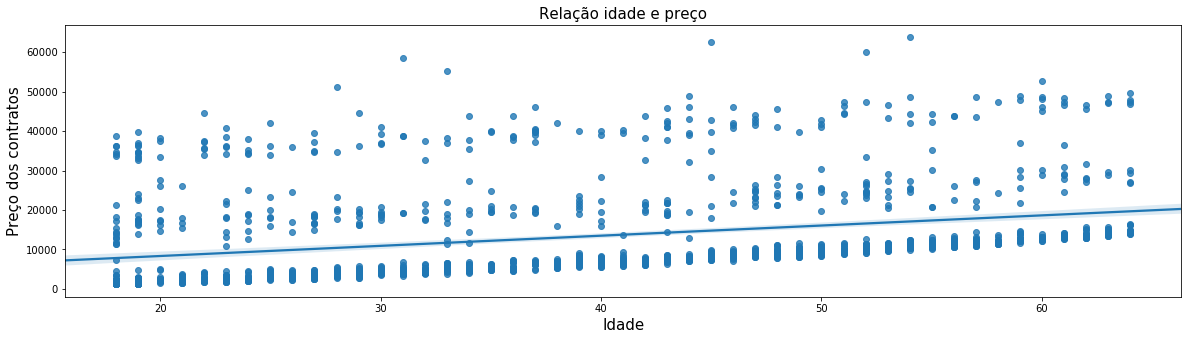

In [7]:
plt.figure(figsize=(20,5))
sns.regplot(x='age',y='charges',data=seguro)
plt.xlabel('Idade',size=15)
plt.ylabel('Sinistro dos contratos',size=15)
plt.title('Relação idade e sinistro',size=15);

Nesse gráfico fica mais clara essa relação: a medida que a idade aumenta, o sinistro médio pago pelos clientes por idade aumenta.

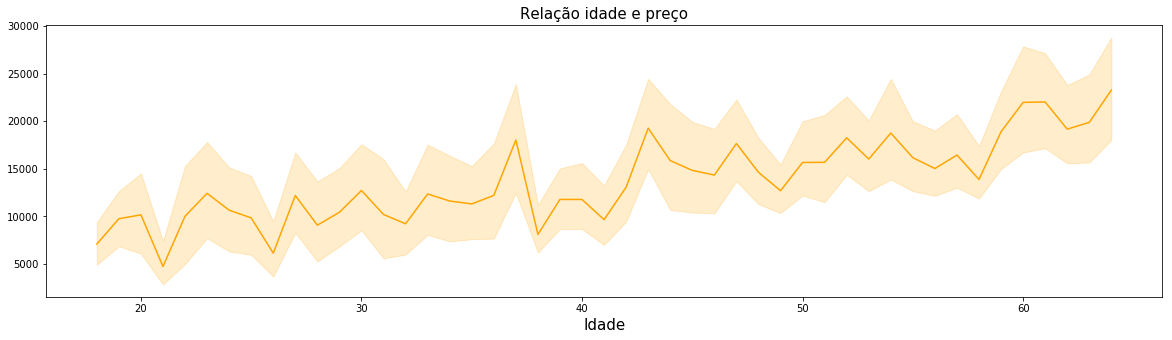

In [8]:
plt.figure(figsize=(20,5))
sns.lineplot(x='age',y='charges',data=seguro,color='orange')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title('Relação idade e sinistro',size=15);

Vamos observar agora a distribuição da coluna idade.

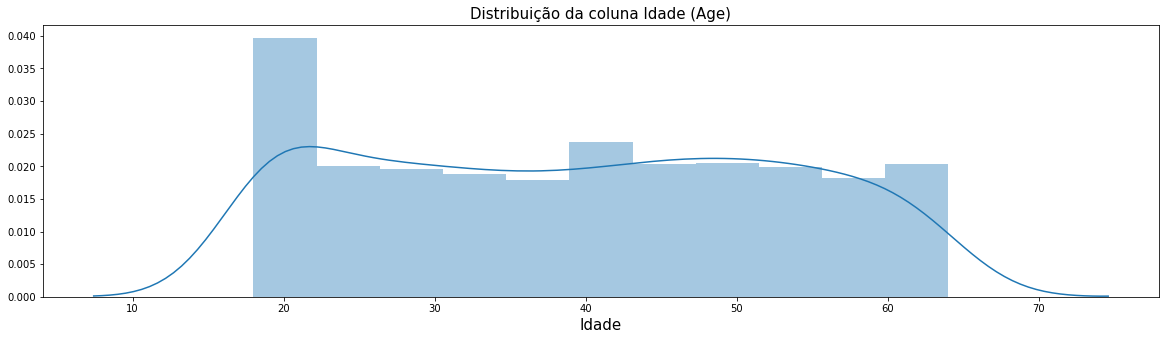

In [9]:
plt.figure(figsize=(20,5))
sns.distplot(seguro['age'])
plt.xlabel("Idade",size=15)
plt.title('Distribuição da coluna Idade (Age)',size=15);

### Análise da coluna *children*

A quantidade de filhos também pode refletir no valor do sinistro, visto que seriam mais pessoas demandando desse serviço.

No gráfico de barras abaixo podemos ver essa relação: a medida que o número de filhos aumenta o valor médio do sinistro também vai aumentando até 3 filhos, após isso o valor do sinistro cai (muito provavelmente por que pessoas que tenham de 4 a 5 filhos possuem uma frequência menor).

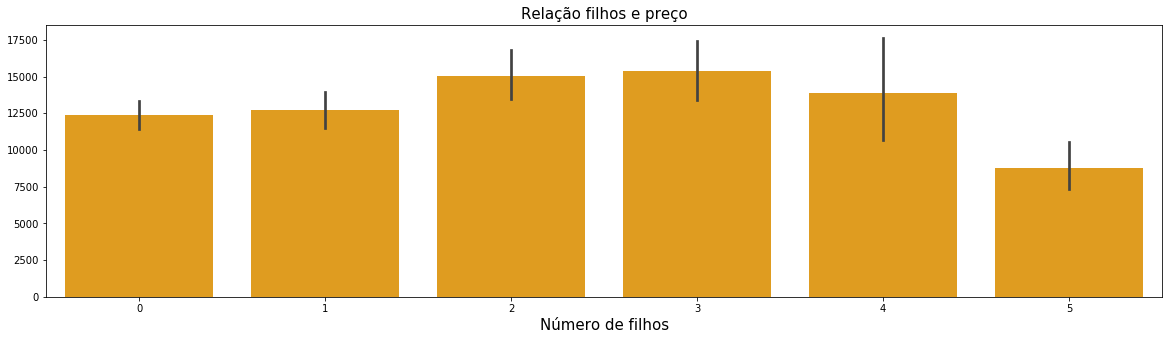

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x='children',y='charges',data=seguro,color='orange')
plt.xlabel('Número de filhos',size=15)
plt.ylabel('')
plt.title('Relação filhos e sinistr',size=15);

Segregando por sexo, vemos que apenas mulheres com 4 filhos pagam mais que os homens, em média, em contratos de planos de saúde.

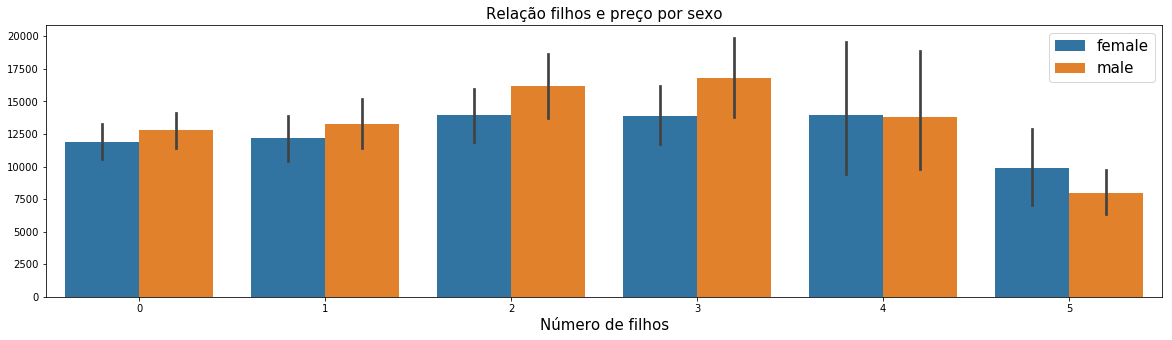

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x='children',y='charges',data=seguro,hue='sex')
plt.xlabel('Número de filhos',size=15)
plt.ylabel('')
plt.title('Relação filhos e sinistro por sexo',size=15)
plt.legend(fontsize=15);

### Análise da coluna *bmi*

O IMC (índice de massa corporal) é uma forma de saber se o peso de uma pessoa está adequado a sua altura e o resultado desse cálculo pode indicar se uma pessoa tem o peso adequado, magreza ou obesidade (que é um fator de risco para doenças e já é considerado uma doença). O cálculo é dado dividindo o peso da pessoa pela altura da pessoa elevada ao quadrado.

Podemos ver abaixo que há uma relação positiva entre o valor do sinistro e o *IMC*.

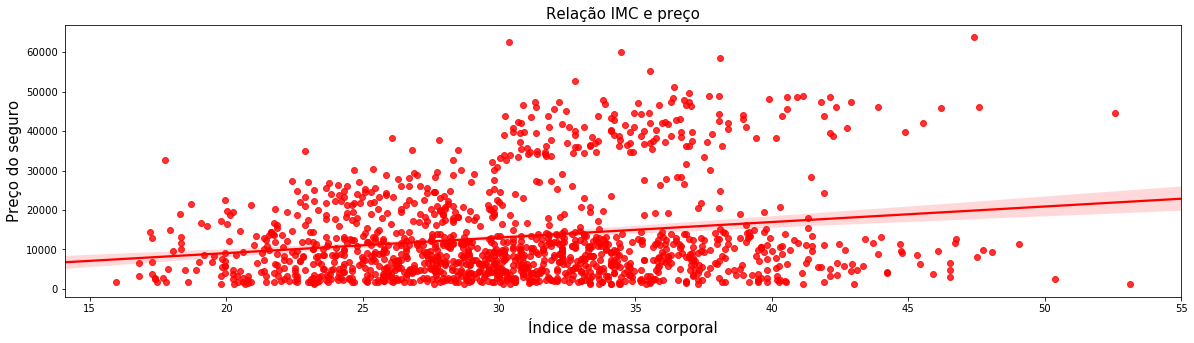

In [12]:
plt.figure(figsize=(20,5))
sns.regplot(x='bmi',y='charges',data=seguro,color='red')
plt.xlabel('Índice de massa corporal',size=15)
plt.ylabel('Valor do sinistro do seguro',size=15)
plt.title('Relação IMC e sinistro',size=15);

A coluna *BMI* parece ter uam distribuição normal.

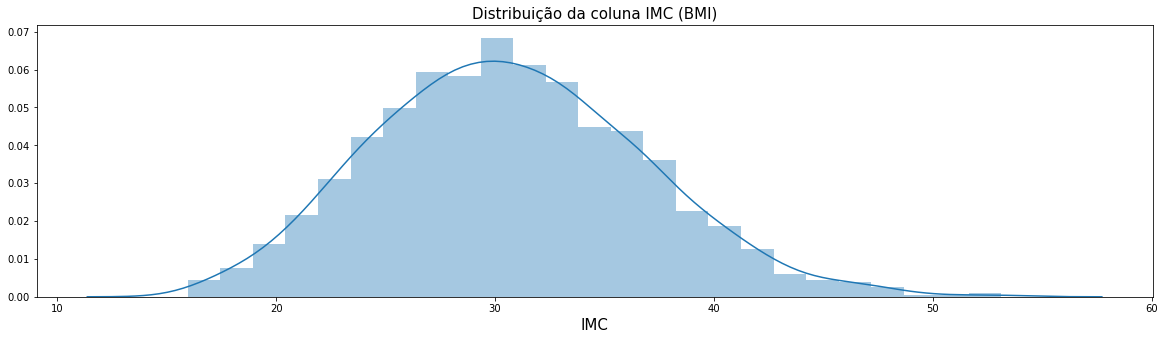

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(seguro['bmi'])
plt.xlabel("IMC",size=15)
plt.title('Distribuição da coluna IMC (BMI)',size=15);

### Analisando a coluna *sex*

Quem será que contrata mais o serviço de seguro de saúde ?

Conforme o gráfico abaixo a diferença é pouca, porém homens contratam mais seguros de planos de saúde.

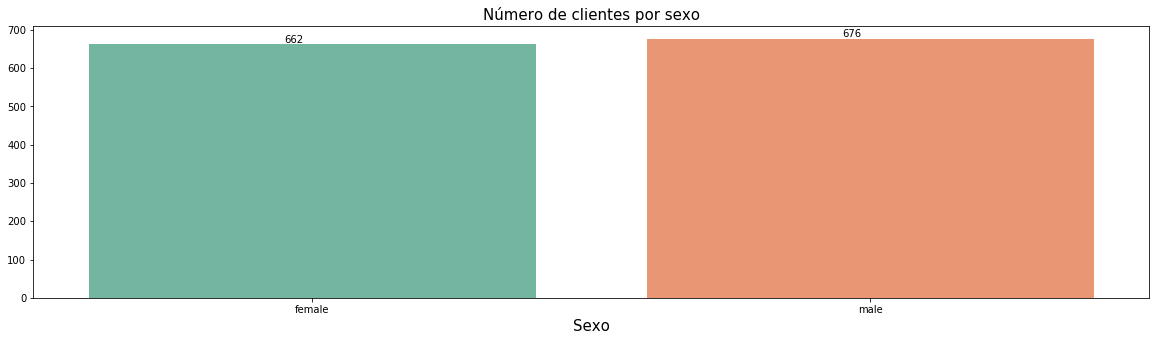

In [14]:
plt.figure(figsize=(20,5))
dx=sns.countplot(x=seguro['sex'], palette="Set2")
plt.xlabel('Sexo',size=15)
plt.title('Número de clientes por sexo',size=15)
plt.ylabel('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+5))
plt.show();

Os homens são os que mais contratam o serviço de seguro dos planos de saúde e são os que mais pagam, em média.

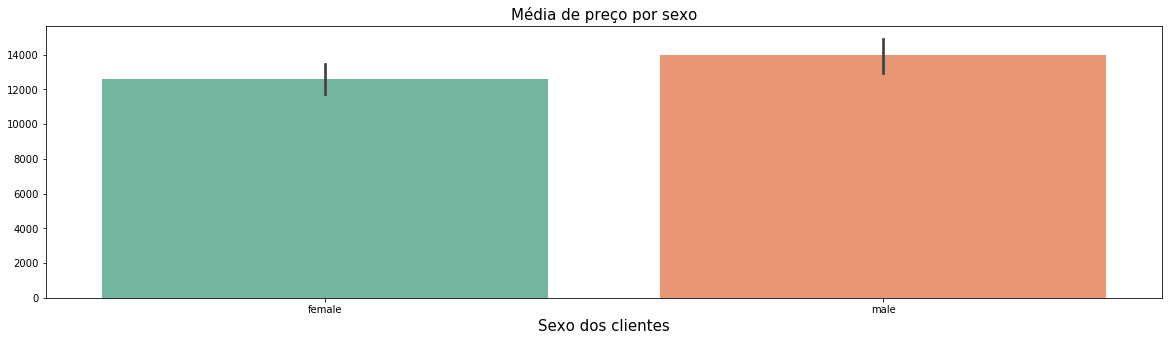

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x="sex", y="charges", palette="Set2", data=seguro)
plt.ylabel('')
plt.xlabel("Sexo dos clientes",size=15)
plt.title('Média do sinistro por sexo',size=15);

### Coluna *smoker*

Ser fumante também contribui para o surgimento de doenças (principalmente respiratórias) e esse comportamento também pode acabar sendo refletido no no valor do sinistro dos planos de saúde.

Vemos que apenas 274 clientes tem o hábito de fumar, mas eles pagam menos ?

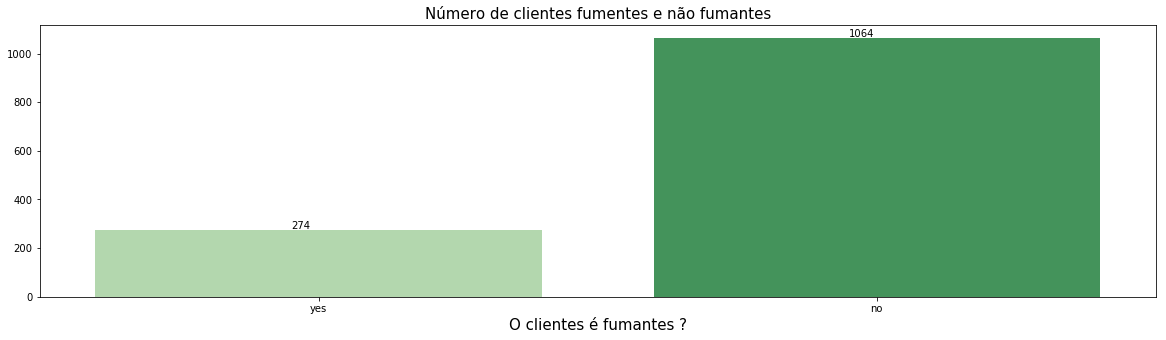

In [16]:
plt.figure(figsize=(20,5))
dx=sns.countplot(x=seguro['smoker'], palette="Greens")
plt.xlabel('O clientes é fumantes ?',size=15)
plt.ylabel('')
plt.title('Número de clientes fumentes e não fumantes',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+5))
plt.show();

Em compensação os fumantes pagam, em média, mais que os não fumantes. Entretanto isso é uma média, por conta do número pequeno de clientes que fumam a média pode acabar aumentando.

Além disso homens fumantes pagam mais que mulheres fumantes, já entre os não fumantes mulheres pagam mais que os homens.

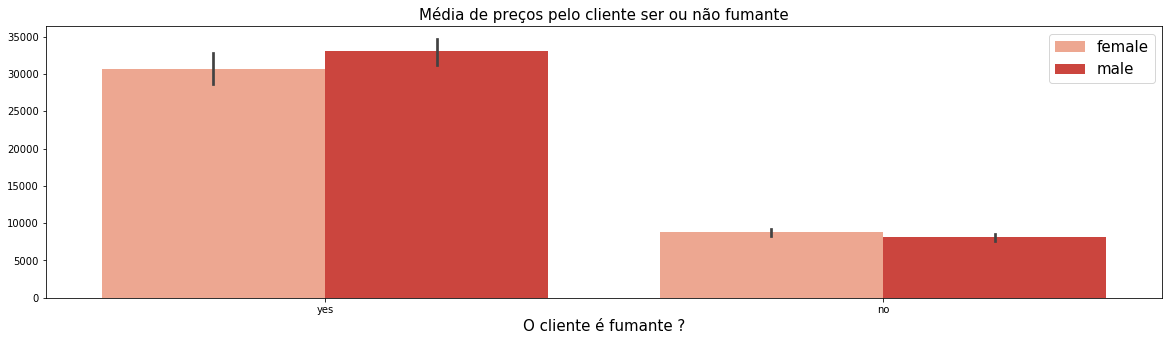

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x="smoker", y="charges", palette="Reds", data=seguro,hue='sex')
plt.xlabel("O cliente é fumante ?",size=15)
plt.ylabel('')
plt.title('Média do valor do sinistro pelo cliente ser ou não fumante',size=15)
plt.legend(fontsize=15);

### Análise da coluna *region*

Uma outra característica é se a região influencia ou no valor médio do sinistro.

Podemos ver que a maioria dos clientes moram na região sudeste (*southeast*) e as demais regiões possuem o mesmo número de clientes.

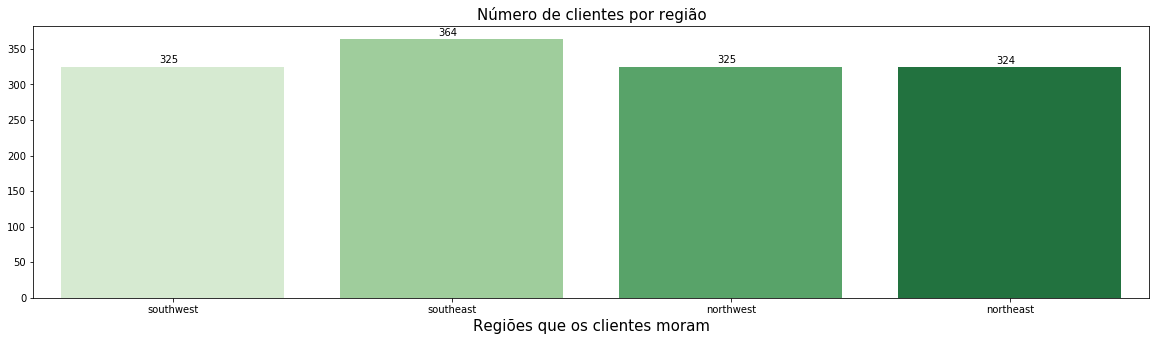

In [18]:
plt.figure(figsize=(20,5))
dx=sns.countplot(x=seguro['region'], palette="Greens")
plt.xlabel('Regiões que os clientes moram',size=15)
plt.ylabel('')
plt.title('Número de clientes por região',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+5))
plt.show();

O clientes da região sudeste (*southeast*) e nordeste (*northeast*) são os que, em média, pagam mais pelos planos de saúde.

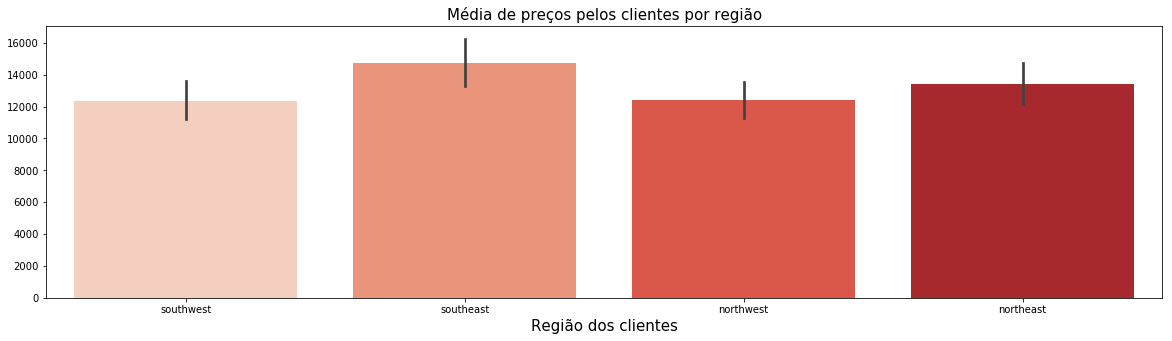

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x="region", y="charges", palette="Reds", data=seguro)
plt.ylabel('')
plt.xlabel("Região dos clientes",size=15)
plt.title('Média do valor do sinistro pelos clientes por região',size=15);

Na região noroeste (*northwest*) as mulheres pagam, em média, mais do que os homens. Nas demais regiões os homens pagam mais pelos planos de saúde, em média.

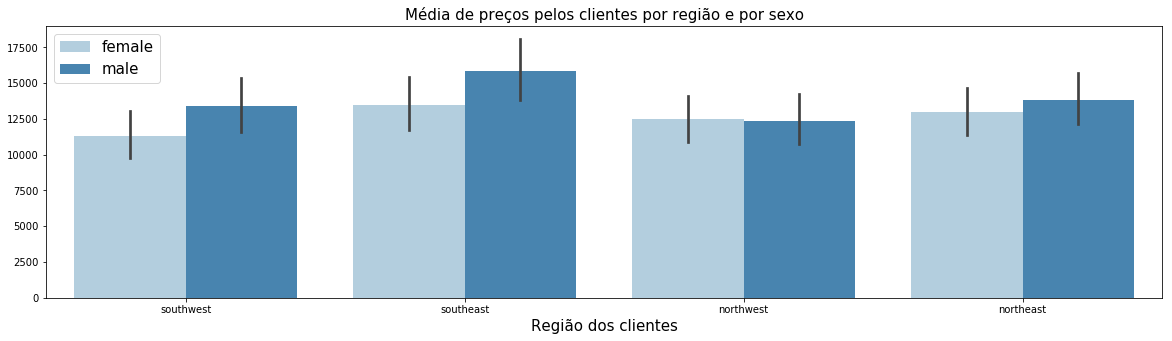

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x="region", y="charges", palette="Blues", data=seguro,hue='sex')
plt.xlabel("Região dos clientes",size=15)
plt.ylabel('')
plt.title('Média do valor do sinistro pelos clientes por região e por sexo',size=15)
plt.legend(fontsize=15);

### Correlação entre as *features*

Vemos que as variáveis que são numéricas são pouco correlacionadas com a variável *charges* que é nossa variável alvo e para problemas de regressão isso é um problema.

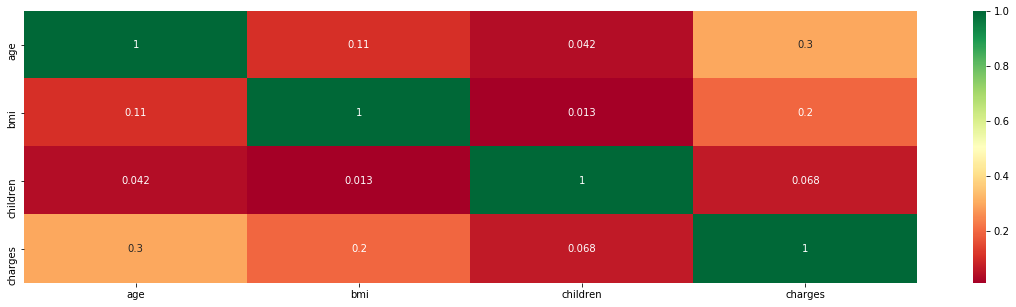

In [21]:
corr1=seguro.corr()
%matplotlib inline
plt.figure(figsize=(20,5))
sns.heatmap(corr1, annot = True, cmap= "RdYlGn");

## Tratamento dos dados

A regressão linear só trabalha com dados numéricos, por isso será necessário fazer algumas alterações entre e no *dataset* existem variáveis não numéricas, como podemos observar abaixo:

In [22]:
seguro.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Vemos que a variável *sex* (sexo), *smoker* (fumante) e *region* (região) são *string*, por isso precisaremos modificá-las para que sejam variáveis numéricas.

**O que faremos ?**

**1) Notemos que as variáveis *sex* e *smoker* são variáveis binárias, pois em cada uma delas há apenas duas respostas possíveis:**

Para *sex* : *female* ou *male* (feminino ou masculino);

Para *smoker*: *yes* ou *no* (sim ou não).

Transformaremos essas variáveis em variáveis binárias que terão como resultado apenas 0 ou 1, que em econometria é chamada de variável dummy e para essa transformação usaremos o método *label encoding*.

**2) Já a variável *region* deverá ser alterada usando o método *pd.get_dummies*.**

#### Transformando *sex, smoker e region*

In [23]:
seguro['sex']=LabelEncoder().fit_transform(seguro['sex'])
seguro['smoker']=LabelEncoder().fit_transform(seguro['smoker'])
seguro=pd.get_dummies(seguro,columns=['region'],prefix=['region'])

Abaixo vemos a nossa base de dados modificada com *sex* e *smoker* como variáveis binárias e *region* que foi transformada em 4 colunas correspondendo cada uma a uma região diferente.

In [24]:
seguro.head(20)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


Vamos agora ver como ficou a correlação das *features* na nova base. Muitas variáveis estão ainda pouco correlacionadas, entretanto já encontramos uma que possui uma correlação alta com a variável *charges* que é *smoker* e isso já é um ponto positivo dessa transformação que realizamos.

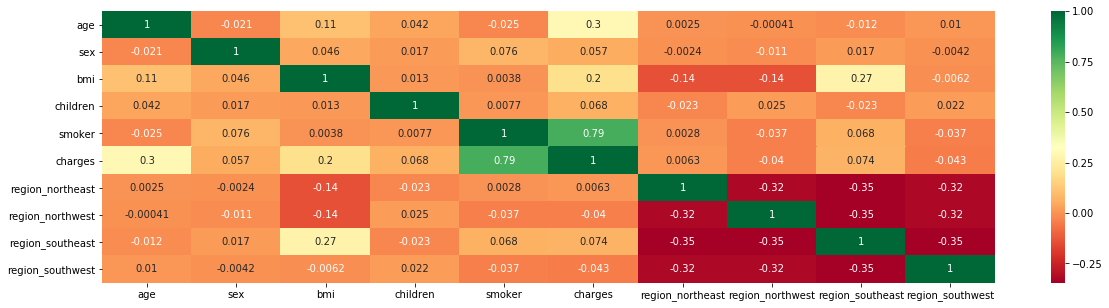

In [25]:
corr1=seguro.corr()
%matplotlib inline
plt.figure(figsize=(20,5))
sns.heatmap(corr1, annot = True, cmap= "RdYlGn");

Pela correlação de *spearman* temos duas variáveis que passam dos 50 de correlação, que são a idade (*age*) e *smoker*.

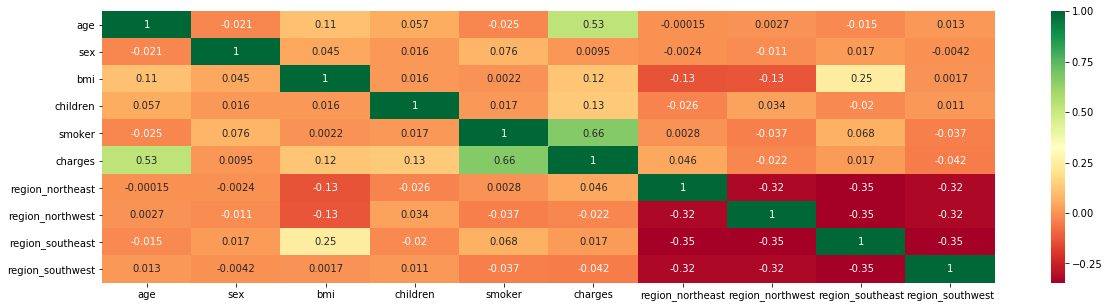

In [26]:
corr1=seguro.corr('spearman')
%matplotlib inline
plt.figure(figsize=(20,5))
sns.heatmap(corr1, annot = True, cmap= "RdYlGn");

Antes não tínhamos nenhuma coluna correlacionada, agora já temos 2 colunas.

Agora que tratamos o conjunto de dados podemos prosseguir para usar a regressão linear já que agora todos os dados 
são numéricos.

## Separando os dados de treino e teste

Vamos antes, definir as variáveis que são *features* e a variável que será *target*

In [27]:
seguro1=seguro
X = seguro1.drop(['charges'],axis=1,inplace=False)
y=seguro1['charges']

E aqui iremos separar os dados de treino e os dados de teste.

In [28]:
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,random_state=42)

## Modelagem com regressão linear

O modelo de regressão linear simples tem a seginte estrutura:

$Y = \beta.X + \epsilon $

Onde $Y$ é a variável dependente ou a ser explicada, $X$ a variável explicativa ou independente e $\epsilon \sim  N(0,\sigma^{2})$.

O modelo de regressão linear atribui a cada uma das *features* um peso e esse peso tem como objetivo minimizar a soma dos erros quadrados entre os valores observados e os valores previstos. O estimador de mínimos quadrados ordinários é uma matriz que segue a fórmula:

$\beta = (X'X)^{-1}X'Y $.

Onde $X$ é a matriz de variáveis independentes (ou preditoras) e $y$ é a variável dependente (ou predita). No nosso projeto estaremos trabalhando com mais de uma variável, então teremos uma regressão múltipla, que tem a seguinte estrutura:

$Y = \beta_{1}.X_{1} + \beta_{2}.X_{2} + \dots + \beta_{k}.X_{k} + \epsilon $

Onde $X_{1},X_{2},\dots,X_{k}$ são as variáveis explicativas.

A soma do quadrados dos resíduos do modelo de resgressão linear é dado por :

$\text{RSS} = \sum_{i=1}^{n} \big[y_{i} - (wx_{i} + b) \big]^{2}$

O nosso primeiro passo será instanciar o modelo e treiná-lo com as *features* que já separamos.

In [29]:
lr_model=LinearRegression().fit(X_treino,y_treino)
x1= lr_model.predict(X_teste).tolist()
x2 = y_teste.tolist()

### Vamos comparar os resultados preditos pelo modelo e o valores reais

Vemos que o modelo não performou muito bem, mas seguiu com valores próximos dos reais.

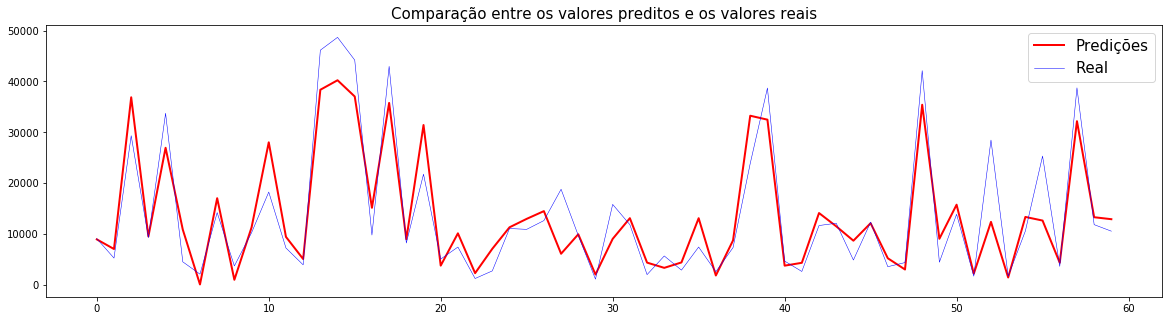

In [30]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:60], linewidth=2, color='r')
plt.plot(x2[:60], linewidth=0.5,color='b')
plt.title('Comparação entre os valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

Uma forma de avaliar esse modelo é utilizando as métricas de avaliação para modelos de regressão: que são o *erro médio absoluto*, o *erro médio quadrado*, o *erro mediano médio* o $R^2$ e o *erro médio absoluto*.

In [31]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,lr_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,lr_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,lr_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,lr_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,lr_model.predict(X_teste)))

O erro médio absoluto é : 4243.654116653135
O erro médio quadrado é : 35117755.73613631
O erro mediano absoluto é : 2699.86836163708
O R quadrado é : 0.7672642952734358
O erro médio absoluto é : 5926.023602394468


Agora vamos tentar encontrar outras *features* para esse modelo, para isso irei utilizar um médtodo chamado *PolynomialFeatures* que como o nome sugere transforma as *features* para polinômios.

Para esse caso iremos transformar nossas *features* para o formato de um polinômio de segundo grau, mas antes, do nosso *dataset* iremos excluir a coluna *charges* que é a nossa variável alvo. O método só será aplicado para as *features*.

In [32]:
seguro2=seguro1
seguro2=seguro2.drop('charges',axis=1)

Vamos aplicar o método para as *features* e vamos reinserir a variável *charges*.

In [33]:
x_poly=PolynomialFeatures(degree=2).fit_transform(seguro2)
seguro2=pd.DataFrame(x_poly)
seguro2['charges']=seguro['charges']

Como esse método gera muitas *features* vamos selecionar apenas aquelas que ultrapassam em 50% a correlação de *spearman*.

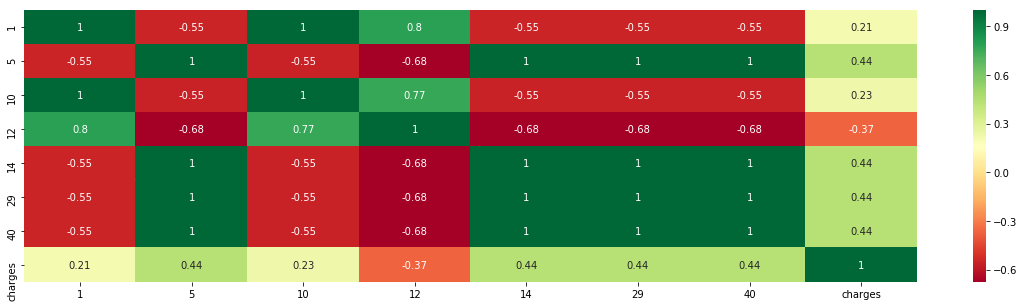

In [34]:
seg2=seguro2.loc[:,abs(seguro2.corr('spearman')['charges'])>0.5].head()

corr2=seg2.corr()
%matplotlib inline
plt.figure(figsize=(20,5))
sns.heatmap(corr2, annot = True, cmap= "RdYlGn");

Vamos inserir apenas 2 dessas *features* na nossa base de dados e refaremos o mesmo procedimento para gerar o modelo de regressão linear.

In [35]:
seguro1['b']=seguro2[14]
seguro1['c']=seguro2[29]

## Dados de treino e de teste

Vamos refazer todo processo de separação das *features* e modelagem dos dados.

In [36]:
X = seguro1.drop(['charges'],axis=1,inplace=False)
y=seguro1['charges']

Separação dos dados de treino e de teste.

In [37]:
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,random_state=42)

## Nova modelagem com regressão linear

Modelagem dos dados e geração das previsões.

In [38]:
lr_model=LinearRegression().fit(X_treino,y_treino)
x3= lr_model.predict(X_teste).tolist()
x4 = y_teste.tolist()

#### Comparando novamente os resultados

Vemos aqui que os dados preditos estão mais alinhados com os valores reais, tendo alguns problemas em alguns picos que não foram modelados corretamente pelo modelo. Aqui estamos visualizando as 60 primeiras observações.

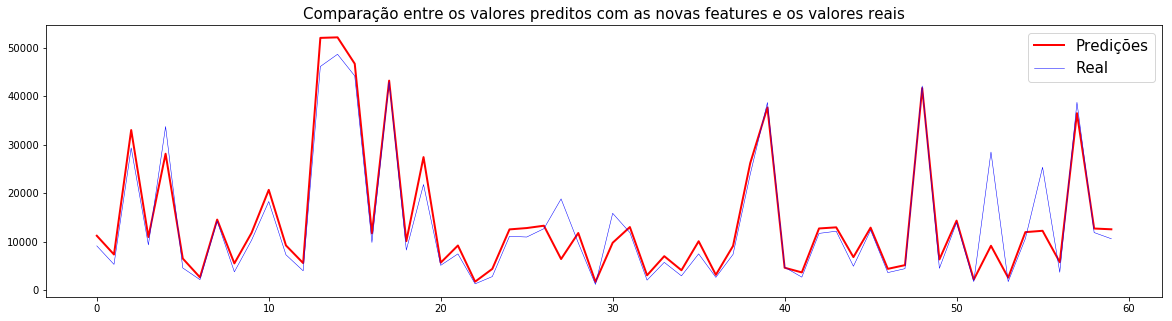

In [39]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x3[:60], linewidth=2, color='r')
plt.plot(x4[:60], linewidth=0.5,color='b')
plt.title('Comparação entre os valores preditos com as novas features e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação

Abaixo podemos ver que todas as métricas de erros caíram bastante em relação às métricas do modelo anterior e o $R^2$ aumentou de 76.7% para 85.37% (um aumento bastante considerável). Concluímos que a inserção de novas *features* pelo método que usamos foi positiva para a modelagem dos dados para gerar um modelo com erro menor e com poder explicativo maior.

In [40]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,lr_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,lr_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,lr_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,lr_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,lr_model.predict(X_teste)))

O erro médio absoluto é : 2785.592897670839
O erro médio quadrado é : 22067396.46853433
O erro mediano absoluto é : 1694.2992920982797
O R quadrado é : 0.8537528677181383
O erro médio absoluto é : 4697.594753545088


## Conclusão

Nesse projeto foi usado um modelo de regressão linear e por meio de uma engenharia de *features* conseguimos encontrar um resultado na modelagem que pode ser considerado satisfatório, com a inserção de *features* polinomiais, como podemos ver pelas métricas de avaliação. Utilizamos ou variações nesse modelo como colocar *features* polinomiais de terceiro e quarto grau e aplicar o *pd.get_dummies* em outras variáveis, mas o resultado se mostrou pior do o que nós encontramos; por isso não inserimos nesse trabalho.

Poderíamos, também, ter utilizado outros modelos, mas como o conjunto de dados é pequeno e bem simples preferimos seguir com o modelo mais simples que é a regressão linear.